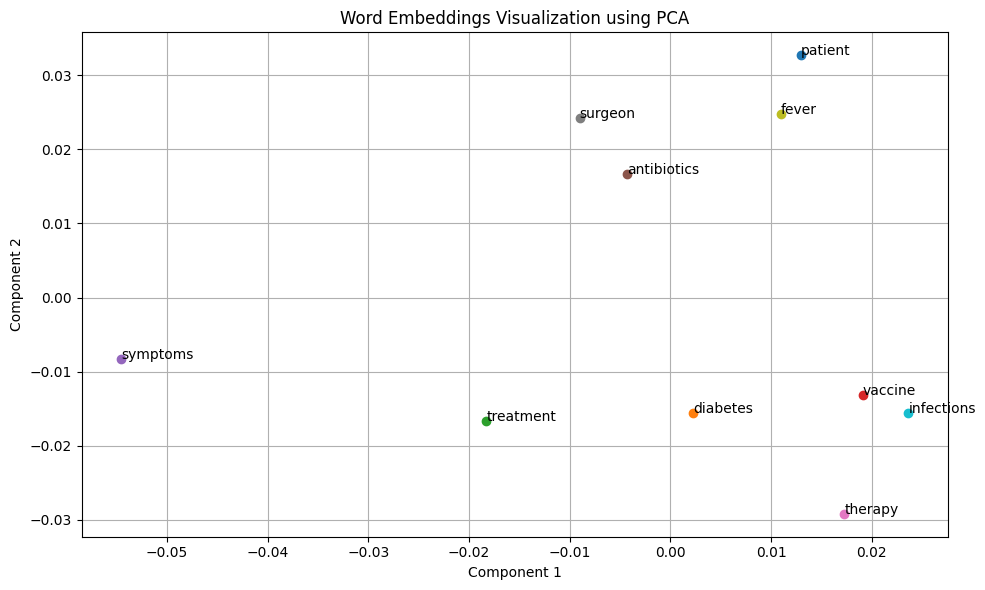

Words similar to 'treatment':
  results (0.32)
  effective (0.19)
  a (0.18)
  symptoms (0.18)
  recommend (0.17)
Words similar to 'diagnosis':
  vaccine (0.18)
  effective (0.17)
  pain (0.17)
  several (0.14)
  rare (0.14)


In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from gensim.models import Word2Vec
import re

medical_corpus = [
    "The patient was diagnosed with diabetes and hypertension.",
    "MRI scans reveal abnormalities in the brain tissue.",
    "The treatment involves antibiotics and regular monitoring.",
    "Symptoms include fever, fatigue, and muscle pain.",
    "The vaccine is effective against several viral infections.",
    "Doctors recommend physical therapy for recovery.",
    "The clinical trial results were published in the journal.",
    "The surgeon performed a minimally invasive procedure.",
    "The prescription includes pain relievers and anti-inflammatory drugs.",
    "The diagnosis confirmed a rare genetic disorder."
]

processed_corpus = [re.findall(r'\b\w+\b', sentence.lower()) for sentence in medical_corpus]
model = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=1, workers=4, epochs=50)

words = ["patient", "diabetes", "treatment", "vaccine", "symptoms",
         "antibiotics", "therapy", "surgeon", "fever", "infections"]


valid_words = [word for word in words if word in model.wv]
word_vectors = np.array([model.wv[word] for word in valid_words])

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
for i, word in enumerate(valid_words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1])) # Adjust the offset here

plt.title("Word Embeddings Visualization using PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

def find_similar_words(input_word, top_n=5):
    try:
        similar_words = model.wv.most_similar(input_word, topn=top_n)
        print(f"Words similar to '{input_word}':")
        for word, similarity in similar_words:
            print(f"  {word} ({similarity:.2f})")
    except KeyError:
        print(f"'{input_word}' not found in vocabulary.")
        
def find_similar_words(input_word, top_n=5):
    try:
        similar_words = model.wv.most_similar(input_word, topn=top_n)
        print(f"Words similar to '{input_word}':")
        for word, similarity in similar_words:
            print(f"  {word} ({similarity:.2f})")
    except KeyError:
        print(f"'{input_word}' not found in vocabulary.")


find_similar_words("treatment")
find_similar_words("diagnosis")